# Text Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Remove punctuation

In [2]:
from nltk.corpus import stopwords                # List of unwantend words
from nltk.tokenize import word_tokenize          # this module helps to process and list words of a given string

In [3]:
import string

In [4]:
import nltk                    # Library for text processing and text mining

In [5]:
#from nltk.tokenize import sent_tokenize, word_tokenize

In [6]:
#  Just in case we have to tokenize an Unicode strig ---->   s.decode("utf8")(or any other encoding)  

__Counting frequency__

In [7]:
from collections import Counter               

In [8]:
from nltk.probability import FreqDist

In [9]:
#from nltk.util import ngrams, bigrams, trigrams

# We are ready to start working with the data

The main idea here is to filter the 'summary' column's cells by words to identify the flights in which the meteorological conditions played a role in the accidents.

We will consider the registers in which the meteorological conditions contributed to an accident. Those conditions might be the main factor or a secondary one. We understand that bad weather conditions is a broad category that goes from a mere drizzle or a cloudy environment that lowers the crew's visibility to extreme meteorological conditions such as a tornado or a typhoon. 

In [10]:
df = pd.read_csv('dataSets//postEDA.csv')

In [11]:
#from nltk.stem import WordNetLemmatizer, PorterStemmer      # reduce a word to its root.
#from nltk.corpus import wordnet
#from nltk import pos_tag
#nltk.download('averaged_perceptron_tagger')

In [12]:
#nltk.download('wordnet')
#nltk.download('omw-1.4')

In [13]:
#df

## A few preprocessing  steps:
- list the DataFrame's column of our interest to analyze it
- make a huge text by converting the list to a string with the join method
- remove punctuation using the translate method 
- remove all the digits in the text

In [14]:
summaryList = df.summary.to_list()

In [15]:
summaryString = ' '.join(summaryList)

In [16]:
summaryWOP = summaryString.translate (str.maketrans ('', '', string.punctuation))

In [17]:
#summaryWOP

In [18]:
summaryCleaned = summaryWOP.translate(str.maketrans('', '', string.digits))

In [19]:
#summaryCleaned

In [20]:
# Lemmatize with POS Tag
from nltk.corpus import wordnet
# function to map pos tags of each word
#print(nltk.pos_tag(nltk.word_tokenize(sent)))

def get_wordnet_pos(string):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([string])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

# 1. Init Lemmatizer
lemmatizer = nltk.WordNetLemmatizer()

# 2. Lemmatize a text with the appropriate POS tag
summaryTokens = nltk.word_tokenize(summaryCleaned)
lematized = [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in summaryTokens]

In [21]:
#lematized

In [22]:
summaryString = ' '.join(lematized)

In [23]:
#summaryString

In [24]:
stop_words = set(stopwords.words('english'))

In [25]:
summary_tokens = word_tokenize(summaryString.lower())
filtered_text = [w for w in summary_tokens if not w in stop_words]

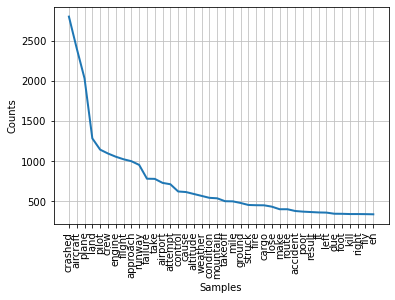

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [26]:
fd = FreqDist(filtered_text)
fd.plot(40)

In [27]:
cnt = Counter(filtered_text)

In [28]:
cnt

Counter({'crashed': 2798,
         'field': 171,
         'attemptting': 1,
         'land': 1282,
         'george': 10,
         'sherlock': 1,
         'kill': 340,
         'mail': 49,
         'plane': 2029,
         'chimney': 8,
         'attempt': 711,
         'heller': 1,
         'poor': 370,
         'visibility': 193,
         'fail': 299,
         'gain': 54,
         'altitude': 590,
         'take': 778,
         'criclklewood': 1,
         'tree': 258,
         'house': 80,
         'pilot': 1142,
         'error': 320,
         'towards': 37,
         'hill': 137,
         'unfavorable': 8,
         'wind': 129,
         'condition': 542,
         'fogthe': 1,
         'first': 116,
         'commercial': 15,
         'air': 260,
         'disaster': 7,
         'result': 365,
         'passenger': 265,
         'fatality': 11,
         'regularly': 1,
         'schedule': 35,
         'service': 35,
         'make': 400,
         'approach': 998,
         'le': 9,
  

In [29]:
totalWords = sorted(cnt.items(), key=lambda pair: pair[1], reverse=True)

In [30]:
totalWords

[('crashed', 2798),
 ('aircraft', 2403),
 ('plane', 2029),
 ('land', 1282),
 ('pilot', 1142),
 ('crew', 1094),
 ('engine', 1054),
 ('flight', 1022),
 ('approach', 998),
 ('runway', 952),
 ('failure', 780),
 ('take', 778),
 ('airport', 728),
 ('attempt', 711),
 ('control', 621),
 ('cause', 614),
 ('altitude', 590),
 ('weather', 566),
 ('condition', 542),
 ('mountain', 536),
 ('takeoff', 500),
 ('mile', 498),
 ('ground', 478),
 ('struck', 453),
 ('fire', 450),
 ('cargo', 449),
 ('lose', 432),
 ('make', 400),
 ('route', 400),
 ('accident', 378),
 ('poor', 370),
 ('result', 365),
 ('ft', 360),
 ('left', 358),
 ('due', 344),
 ('foot', 343),
 ('kill', 340),
 ('right', 340),
 ('fly', 339),
 ('en', 337),
 ('wing', 321),
 ('error', 320),
 ('shortly', 316),
 ('loss', 314),
 ('fuel', 307),
 ('low', 304),
 ('fail', 299),
 ('fog', 295),
 ('short', 293),
 ('stall', 289),
 ('hit', 288),
 ('captain', 286),
 ('minute', 284),
 ('area', 272),
 ('passenger', 265),
 ('one', 265),
 ('descend', 265),
 ('air'

### Bigrams

We will remove all the words that appear in the most frequent bigrams and don't add any valuable information related to the weather conditions. To do so, we'll collect them in an "unwanted words" list.

In [31]:
unwanted_words= ['crashed', 'aircraft','plane','pilot','crew','engine','flight','approach','runway','failure',
                 'airport','attempt','altitude','cause','mountain','takeoff','mile','ground','struck','fire','cargo','lose',
                 'make','route','accident','result','ft','due','foot','kill','right','fly','en','wing','error','shortly',
                 'loss','fuel' ,'fail','stall','captain','minute','passenger','descend','two','tree','turn','crash','power',
                 'procedure','descent','sea','follow','time','airplane','go','report','km','flame','broke','maintain','lead',
                 'return','climb','speed','try','force','use','mt','lack','burn','aboard','position','unknown','second',
                 'improper','final','decision','course','helicopter','caught','gear','carry','collision','without','first',
                 'wreckage','name','height','three','could','continued','fatigue','reason','inadequate','later','atc','part',
                 'bank','problem','possible','become','roll','collide','contribute','north','divert','river','midair',
                 'emergency','wooded','mountainous','spatial','contact','hold','pattern','land','rate','gravity','safety',
                 'atlantic','ocean','slope','traffic','come','base','controlled','never','explosive','elevator','contributing'
                'safe','pitch','york','warn','controller','salt','high','naval','trace','san','francisco','military','de',
                'janeiro']

In [32]:
filtered_text = [w for w in filtered_text if not w in unwanted_words]

In [33]:
biTokens= nltk.bigrams(filtered_text)
frequencyB = nltk.FreqDist(biTokens)

#### Plot the most frequent bigrams now that we got rid of some unwanted words

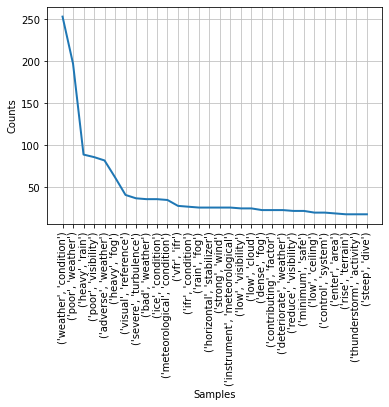

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [34]:
frequencyB.plot(30)

In [35]:
cnt = frequencyB

In [36]:
cnt

FreqDist({('weather', 'condition'): 253, ('poor', 'weather'): 197, ('heavy', 'rain'): 89, ('poor', 'visibility'): 86, ('adverse', 'weather'): 82, ('heavy', 'fog'): 62, ('visual', 'reference'): 41, ('severe', 'turbulence'): 37, ('bad', 'weather'): 36, ('ice', 'condition'): 36, ...})

In [37]:
cnt = sorted(cnt.items(), key=lambda pair: pair[1], reverse=True)

In [38]:
len(cnt)

42823

In [39]:
# The list below should show us keywords to filter flight registers by bad weather conditions. Let's choose them carefuly.

In [40]:
cnt

[(('weather', 'condition'), 253),
 (('poor', 'weather'), 197),
 (('heavy', 'rain'), 89),
 (('poor', 'visibility'), 86),
 (('adverse', 'weather'), 82),
 (('heavy', 'fog'), 62),
 (('visual', 'reference'), 41),
 (('severe', 'turbulence'), 37),
 (('bad', 'weather'), 36),
 (('ice', 'condition'), 36),
 (('meteorological', 'condition'), 35),
 (('vfr', 'ifr'), 28),
 (('ifr', 'condition'), 27),
 (('rain', 'fog'), 26),
 (('horizontal', 'stabilizer'), 26),
 (('strong', 'wind'), 26),
 (('instrument', 'meteorological'), 26),
 (('low', 'visibility'), 25),
 (('low', 'cloud'), 25),
 (('dense', 'fog'), 23),
 (('contributing', 'factor'), 23),
 (('deteriorate', 'weather'), 23),
 (('reduce', 'visibility'), 22),
 (('minimum', 'safe'), 22),
 (('low', 'ceiling'), 20),
 (('control', 'system'), 20),
 (('enter', 'area'), 19),
 (('rise', 'terrain'), 18),
 (('thunderstorm', 'activity'), 18),
 (('steep', 'dive'), 18),
 (('vfr', 'adverse'), 18),
 (('artificial', 'horizon'), 18),
 (('initiate', 'goaround'), 18),
 ((

#### Let's apply the same procedure to the trigrams.

## Trigrams 

In [41]:
triTokens= nltk.trigrams(filtered_text)
frequencyT = nltk.FreqDist(triTokens)

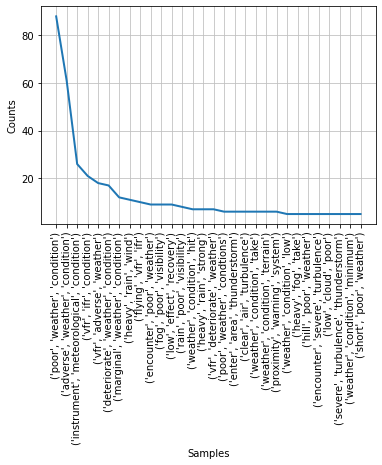

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [42]:
frequencyT.plot(30)

In [43]:
cnt = frequencyT

In [44]:
len(frequencyT)

50511

In [45]:
cnt

FreqDist({('poor', 'weather', 'condition'): 88, ('adverse', 'weather', 'condition'): 61, ('instrument', 'meteorological', 'condition'): 26, ('vfr', 'ifr', 'condition'): 21, ('vfr', 'adverse', 'weather'): 18, ('deteriorate', 'weather', 'condition'): 17, ('marginal', 'weather', 'condition'): 12, ('heavy', 'rain', 'wind'): 11, ('flying', 'vfr', 'ifr'): 10, ('encounter', 'poor', 'weather'): 9, ...})

In [46]:
cnt = sorted(cnt.items(), key=lambda pair: pair[1], reverse=True)

In [47]:
cnt

[(('poor', 'weather', 'condition'), 88),
 (('adverse', 'weather', 'condition'), 61),
 (('instrument', 'meteorological', 'condition'), 26),
 (('vfr', 'ifr', 'condition'), 21),
 (('vfr', 'adverse', 'weather'), 18),
 (('deteriorate', 'weather', 'condition'), 17),
 (('marginal', 'weather', 'condition'), 12),
 (('heavy', 'rain', 'wind'), 11),
 (('flying', 'vfr', 'ifr'), 10),
 (('encounter', 'poor', 'weather'), 9),
 (('fog', 'poor', 'visibility'), 9),
 (('low', 'effect', 'recovery'), 9),
 (('rain', 'poor', 'visibility'), 8),
 (('weather', 'condition', 'hit'), 7),
 (('heavy', 'rain', 'strong'), 7),
 (('vfr', 'deteriorate', 'weather'), 7),
 (('poor', 'weather', 'condtions'), 6),
 (('enter', 'area', 'thunderstorm'), 6),
 (('clear', 'air', 'turbulence'), 6),
 (('weather', 'condition', 'take'), 6),
 (('weather', 'condition', 'terrain'), 6),
 (('proximity', 'warning', 'system'), 6),
 (('weather', 'condition', 'low'), 5),
 (('heavy', 'fog', 'take'), 5),
 (('hill', 'poor', 'weather'), 5),
 (('encoun

## Look for bad weather flights

In [48]:
# We'll create two list with words describing adverse meteorological conditions.
# the first one with monograms that will be recorded in an auxiliary column. The second one with a few bigrams tha we will 
# record in a second auxiliary column.
# We can make them with the information we've already gathered plus doing some research on specialized web pages.

In [49]:
weather = ['weather', 'conditions', 'drizzle', 'visibility', 'fog', 'foggy', 'wind', 'windy', 'winds', 'rain','rainy',
           'raining','rainstorm','storm','storms','lightningstorm','ice','meteorological','snow', 'snowstorm','crosswind',
           'freeze','freezing','misty','frozen', 'frost','hail','smoke','sleet','cloud', 'clouds','microburst','turbulence',
           'thunderstorm','haze','cumulus','cumulonimbus','icing','tornado','monsoon','typhoon','sand','ifr','imc','vmc',
           'dust', 'hydroplaning','aquaplaning', 'dew', 'zero-zero', 'zero', 'zerozero','downdraught','downdraughts','gust',
           'mist']   

In [50]:
lBigrams = ['by lightning','weather condition', 'poor visibility', 'low visibility','standing water',
           'sleet storm','mountain wave']  

In [51]:
weather= sorted(weather)
print(weather)

['aquaplaning', 'cloud', 'clouds', 'conditions', 'crosswind', 'cumulonimbus', 'cumulus', 'dew', 'downdraught', 'downdraughts', 'drizzle', 'dust', 'fog', 'foggy', 'freeze', 'freezing', 'frost', 'frozen', 'gust', 'hail', 'haze', 'hydroplaning', 'ice', 'icing', 'ifr', 'imc', 'lightningstorm', 'meteorological', 'microburst', 'mist', 'misty', 'monsoon', 'rain', 'raining', 'rainstorm', 'rainy', 'sand', 'sleet', 'smoke', 'snow', 'snowstorm', 'storm', 'storms', 'thunderstorm', 'tornado', 'turbulence', 'typhoon', 'visibility', 'vmc', 'weather', 'wind', 'winds', 'windy', 'zero', 'zero-zero', 'zerozero']


In [52]:
# An auxiliary function to clean and normalize strings
def clean_string(myString):
    myString = myString.translate (str.maketrans ('', '', string.punctuation))
    myString = myString.translate(str.maketrans('', '', string.digits))
    myString = myString.lower()
    #myListedString = nltk.word_tokenize(myString)             #Tengo que enlistarlas para poder crear los bigrams
    #listOfTokens = [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in myString]
    return myString    

In [53]:
#print(clean_string(df.summary[17]))

In [54]:
def find_bigrams_in_cell(mTexto):
    bigramsEnCelda =[]
    myString = clean_string(mTexto)
    myListedString = nltk.word_tokenize(myString) 
    for wrd in weather:
        finder = nltk.BigramCollocationFinder.from_words(myListedString)
        word_filter = lambda w1, w2: wrd not in (w1, w2)
        finder.apply_ngram_filter(word_filter)
        bigram_measures = nltk.collocations.BigramAssocMeasures()
        raw_freq_ranking = finder.nbest(bigram_measures.raw_freq, 4)
        if raw_freq_ranking != []:
            bigramsEnCelda.append(raw_freq_ranking)
            
    return bigramsEnCelda

In [55]:
#find_bigrams_in_cell(df.summary.iloc[953])

In [56]:
# create a new column to store the found bigrams containing keywords
df['auxiliar'] = ''                                  

In [57]:
# find bigrams and store them in the corresponding cell
df['auxiliar'] = df['summary'].apply(lambda x: find_bigrams_in_cell(x))

In [58]:
def return_unique_bigrams(aString): 
    elementos = set()
    aString = clean_string(aString)
    for element in lBigrams:
        if element in aString:
            elementos.add(element)
    return elementos     

In [59]:
df['auxiliar2'] = df['summary'].apply(lambda x: return_unique_bigrams(x))

#### Check the suspicious results

In [60]:
#df.iloc[4000:]

In [61]:
#df.auxiliar[894]

In [62]:
#df.summary[894]

In [63]:
# The following list contains the indexes of the registers that were mistakenly marked as bad weather conditions flights.

In [64]:
falsePoorWeatherCond =[1,15,17,85,346,459,493,547,595,618,705,719,836,846,852,863,888,915,909,1054,1093,1102,1111,1556,1559,1693,
           1736,1800,1803,1915,1949,2013,2048,2053,2071,2089,2100,2102,2109,2121,2129,2154,2300,2314,2347,2379,2384,
           2416,2418,2462,2475,2503,2522,2535,2541,2558,2583,2600,2615,2616,2622,2629,2654,2678,2700,2716,2718,2758,
           2917,2944,3067,3163,3187,3201,3242,3248,3260,3279,3281,3287,3298,3306,3315,3337,3364,3368,3395,3427,3458,
           3490,3517,3528,3548,3597,3600,3619,3651,3766,3827,3840,3888,3912,3960,3969,3998] 

In [65]:
len(falsePoorWeatherCond)

105

#### Encode the bad weather flights

In [66]:
df2 = df.copy()

In [67]:
def is_empty(value):
    if value == []  :
        return 0
    else : 
        return 1

In [68]:
df2['auxiliar2'] = df2['auxiliar'].apply(is_empty)

In [69]:
for rowIndex  in range(len(df2)):
    if rowIndex in falsePoorWeatherCond:
        df2.at[rowIndex,'auxiliar2'] = 0

We don't need the column 'auxiliar' anymore. So, we can drop it.

In [70]:
df2.drop(columns =['auxiliar'], inplace = True)

In [71]:
df2=df2.rename(columns = {'auxiliar2':'meteorological'})

In [72]:
contador = 0
for lis in df.auxiliar:
    if len(lis) > 0:
        contador +=1
print(f"There were {contador} registers originally marked as having bad weather conditions.")   

There were 1510 registers originally marked as having bad weather conditions.


In [73]:
print(f'After a deeper observation we considered that {len(falsePoorWeatherCond)} were mistakenly marked as having bad weather\
 conditions.')

After a deeper observation we considered that 105 were mistakenly marked as having bad weather conditions.


In [74]:
print(f'We could confirm {df2.meteorological.value_counts()[1]} registers of flights in adverse meteorological conditions.')

We could confirm 1405 registers of flights in adverse meteorological conditions.


## Load dataframe to a sql database

#### First of all, we have to import our database manager

In [75]:
import sqlite3

In [84]:
import os 

In [85]:
os.makedirs('dataBases', exist_ok=True)  # make a new directory to locate the database

In [90]:
db = 'dataBases//air_accidents.db'

#### Then, we'll feed the data into the database.

In [91]:
# The function below creates a database or connects to an existing one if it already exists, then makes a table and storages
# the data.

In [92]:
def dataset_to_table(df,database):
    conn = sqlite3.connect(database)
    c = conn.cursor()
    
    c.execute("""CREATE TABLE IF NOT EXISTS accident (year INTEGER, crash_location TEXT, operator TEXT,
            route TEXT, ac_type TEXT, registration TEXT, all_aboard INTEGER, passengers_on_board INTEGER
            crew_aboard INTEGER, total_fatalities INTEGER, passenger_fatalities INTEGER, crew_fatalities INTEGER,
            ground INTEGER, countries TEXT)""")
    conn.commit()
    
    df.to_sql('accident', conn, if_exists='replace', index = False)
    conn.close

In [93]:
dataset_to_table(df2, db)

#### Lastly, we'll make sure that the data is available, to do this we load the table and turn it back to a dataframe.¶

In [94]:
def load_table_as_df(database):
    conn = sqlite3.connect(database)
    df = pd.read_sql_query("SELECT * FROM accident", conn)
    conn.close()
    return df

In [95]:
df10 = load_table_as_df(db)

In [99]:
#df10.tail(50)